In [172]:
import pandas as pd
import geopandas as gpd 
import requests 
import json
from datetime import datetime
from io import StringIO
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

from shapely import wkt


In [2]:
from airqualityandclimateAPI import *

In [ ]:
# !pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [geopy]


In [3]:
illinoiscode = '17'
cookcode = '031'
extra = 'none'

# PMdf = airquality(illinoiscode, cookcode, True)
airdf = airquality(illinoiscode, cookcode, 2025, PMcodes=False)

Air quality API request took 62.08484506607056 seconds


In [6]:
airdf['date_local'] = pd.to_datetime(airdf['date_local'])
airdf['date_local'].max()

# airdf.head()

Timestamp('2025-11-30 00:00:00')

In [ ]:
# PM code checker:
# codeequals = PMdf.loc[PMdf['code'] == '88105', 'value_represented']

# Code list:
# for index, row in PMdf.iterrows():
#     print(row['code'], row['value_represented'])


NameError: name 'PMdf' is not defined

In [10]:
dir = '/Users/griffinberonio/Documents/AAE 724/Datasets/climatedata'
totaldf = None
for file in os.listdir(dir):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(dir, file))
        if totaldf is None:
            totaldf = df
        else:
            totaldf = pd.concat([totaldf, df], ignore_index=True)

filepath = '/Users/griffinberonio/Documents/AAE 724/Datasets/climatedata/totalclimatedata.csv'
totaldf.to_csv(filepath, index=False)

/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/4040326799.py:5: DtypeWarning: Columns (9,11,12,13,14,15,36,55,92,93,94,95,96,97,98,99,100,101,102,103) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(dir, file))
/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/4040326799.py:5: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(dir, file))


In [14]:
totaldf.head()
# totaldf['STATION'].unique()

totaldf['DATE'] = pd.to_datetime(totaldf['DATE'])
totaldf['DATE'].max()


Timestamp('2025-01-02 23:55:00')

# Renewable Generators Data 

In [190]:
renewablespath = '/Users/griffinberonio/Documents/AAE 724/Datasets/RenewableGeneratorsRegisteredinGATS_20260203_110659.csv'
renewablesdf = pd.read_csv(renewablespath, encoding='latin-1')
# renewablesdf.head()

/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/3715769141.py:2: DtypeWarning: Columns (4,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  renewablesdf = pd.read_csv(renewablespath, encoding='latin-1')


In [225]:
cookrenewables = renewablesdf[(renewablesdf['State'] == 'IL') & (renewablesdf['County'] == 'Cook')]
cookrenewables['Date Online'] = pd.to_datetime(cookrenewables['Date Online'])
cookrenewables['Date Online'].min()

/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/4255853314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookrenewables['Date Online'] = pd.to_datetime(cookrenewables['Date Online'])


Timestamp('1989-03-01 00:00:00')

In [226]:
# Find the total number of active renewable generators in the county, and the total capacity of those generators.
cookrenewables.shape
plants = cookrenewables['Plant Name'].unique()
gencolumns = cookrenewables.columns
uniqueids = cookrenewables['GATS Unit ID'].unique()
cookrenewables['YEAR'] = cookrenewables['Date Online'].dt.year
cookrenewables['MONTH'] = cookrenewables['Date Online'].dt.month
#Filtering by study period: 
cookfiltered = cookrenewables[(cookrenewables['YEAR'] >= 2015) & (cookrenewables['YEAR'] < 2026)]
filteredids = cookfiltered['GATS Unit ID'].unique()

len(uniqueids)

/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/1733117344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookrenewables['YEAR'] = cookrenewables['Date Online'].dt.year
/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/1733117344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookrenewables['MONTH'] = cookrenewables['Date Online'].dt.month


26513

/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/718277245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookfiltered['Count'] = cookfiltered.groupby('YEAR')['GATS Unit ID'].transform('count')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020'),
  Text(6, 0, '2021'),
  Text(7, 0, '2022'),
  Text(8, 0, '2023'),
  Text(9, 0, '2024'),
  Text(10, 0, '2025')])

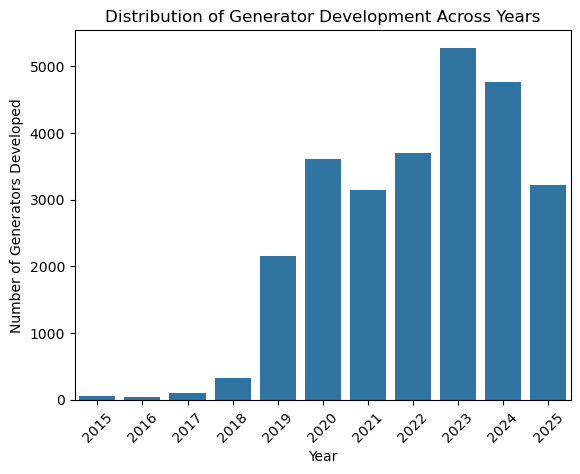

In [227]:
# Look at the distribution of generator development across all years, identify the top three years for generator development 
cookfiltered['Count'] = cookfiltered.groupby('YEAR')['GATS Unit ID'].transform('count')

sns.barplot(x='YEAR', y='Count', data=cookfiltered)
plt.title('Distribution of Generator Development Across Years')
plt.xlabel('Year')
plt.ylabel('Number of Generators Developed')
plt.xticks(rotation=45)

In [228]:
top3year = cookfiltered['YEAR'].value_counts().nlargest(3).index.tolist()
top3year

[2023, 2024, 2022]

In [229]:
# Look at the mean, median, and standard deviation of generator development across all years:
yearly_stats = pd.DataFrame(cookfiltered['Count'].agg(['count', 'mean','std','median']).round(2))
yearly_stats = yearly_stats.rename(columns={'Count' : 'Value'})
yearly_stats

,Value
count,26419.00
mean,3877.52
std,1080.10
median,3704.00


/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/2383557225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookfiltered['yearly total capacity'] = cookfiltered.groupby('YEAR')['Nameplate'].transform('sum')
/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/2383557225.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookfiltered['average capacity'] = cookfiltered.groupby('YEAR')['Nameplate'].transform('mean')
/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33

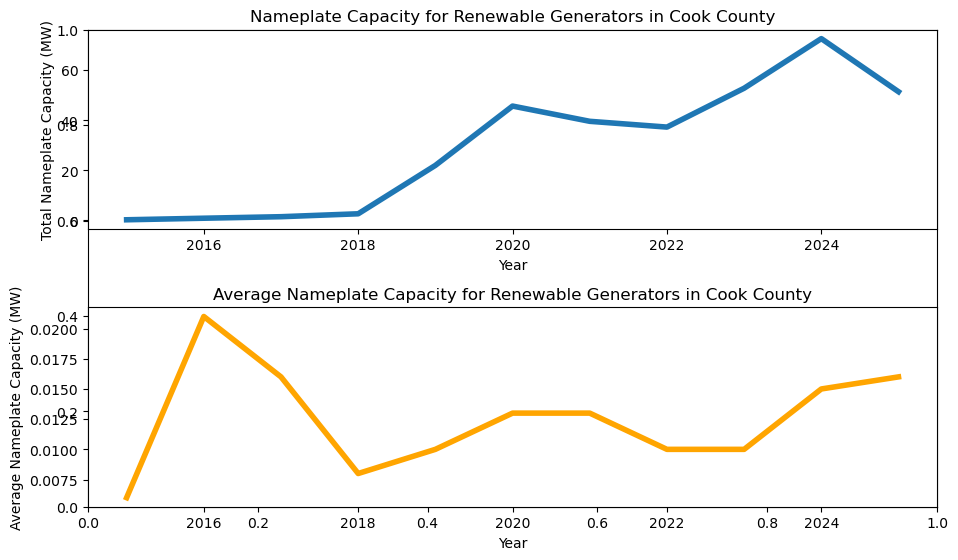

In [234]:
# Looking at Nameplate Capactiy Distribution: 
cookfiltered['yearly total capacity'] = cookfiltered.groupby('YEAR')['Nameplate'].transform('sum')

fig, ax = plt.subplots(figsize=(10, 6))
plt.subplot(2,1,1)
sns.lineplot(x='YEAR', y='yearly total capacity', data=cookfiltered, linewidth=4)
plt.title('Nameplate Capacity for Renewable Generators in Cook County')
plt.xlabel('Year')
plt.ylabel('Total Nameplate Capacity (MW)')

# Average Nameplate Capacity:
cookfiltered['average capacity'] = cookfiltered.groupby('YEAR')['Nameplate'].transform('mean')
cookfiltered['average capacity'] = cookfiltered['average capacity'].round(3)
plt.subplot(2,1,2)
sns.lineplot(x='YEAR', y='average capacity', data=cookfiltered, linewidth=4, color = 'orange')
plt.title('Average Nameplate Capacity for Renewable Generators in Cook County')
plt.xlabel('Year')
plt.ylabel('Average Nameplate Capacity (MW)')

plt.tight_layout()

In [243]:
#Finding the names of maximum nameplate capacity generators overall:
max_capacity = cookfiltered['Nameplate'].sort_values().tail(10)
max_capacity_generators = cookfiltered[cookfiltered['Nameplate'].isin(max_capacity)][['Plant Name', 'Nameplate']]
max_capacity_generators.sort_values(by='Nameplate', ascending=False)

,Plant Name,Nameplate
60104,Cottage Grove Ave Solar,2.99280
100312,"Gooseberry Solar, LLC",2.94801
134361,"Torrence Ave Solar 1, LLC",2.94801
114877,North Cottage Grove Solar 1 LLC,2.82100
52460,Albertsons at Melrose Park,2.77164
99803,"Gelita USA, Inc. (Applic ID #25029 IL ABP)",2.65914
100169,Glenwood Solar,2.64480
30627,105125 - IL BEDFORD PARK 7035 W 65TH ST (19575),2.59794
51402,92756 - IL BEDFORD PARK 6901 W 65TH ST (19574),2.37762
102363,IGS Frankfort 2 - ID 1673,2.33682


/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/3714347330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cookfiltered['monthlycounts'] = cookfiltered.groupby(['YEAR', 'MONTH'])['GATS Unit ID'].transform('count')


([<matplotlib.axis.XTick at 0x37e064b90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

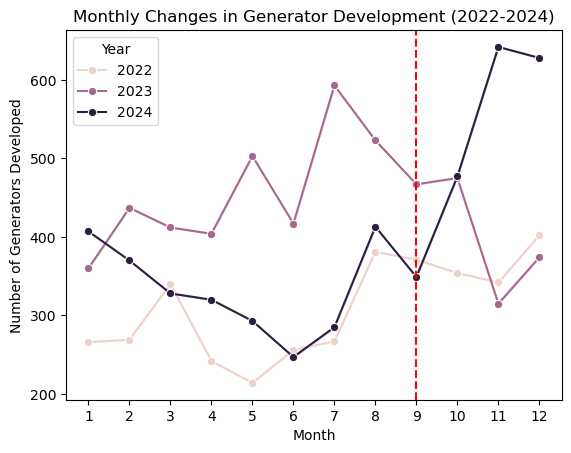

In [247]:
# Monthly changes in development between 2022 and 2024:
cookfiltered['monthlycounts'] = cookfiltered.groupby(['YEAR', 'MONTH'])['GATS Unit ID'].transform('count')
monthlydf = cookfiltered[(cookfiltered['YEAR'] >= 2022) & (cookfiltered['YEAR'] < 2025 )]

sns.lineplot(x='MONTH', y='monthlycounts', data=monthlydf, hue='YEAR', marker='o')
plt.axvline(x=9, color='red', linestyle='--')
plt.title('Monthly Changes in Generator Development (2022-2024)')
plt.xlabel('Month')
plt.ylabel('Number of Generators Developed')
plt.legend(title='Year')
plt.xticks(range(1, 13))


# Climate Data Variable Data 

In [275]:
climatepath = '/Users/griffinberonio/Documents/AAE 724/Datasets/climatedata/totalclimatedata.csv'
climatedf = pd.read_csv(climatepath)
climatedf['DATE'] = pd.to_datetime(climatedf['DATE'])
climatedf['YEAR'] = climatedf['DATE'].dt.year
climatedf['MONTH'] = climatedf['DATE'].dt.month


/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/3534112370.py:2: DtypeWarning: Columns (9,11,12,13,14,15,18,23,28,36,38,40,55,56,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106) have mixed types. Specify dtype option on import or set low_memory=False.
  climatedf = pd.read_csv(climatepath)


In [276]:
# Chicago shapefile data:
chicagoshape = gpd.read_file('/Users/griffinberonio/Documents/AAE 724/Datasets/Boundaries_Chicago.csv')
chicagoshape['the_geom'] = gpd.GeoSeries.from_wkt(chicagoshape['the_geom'])
chicagoshape2 = gpd.GeoDataFrame(chicagoshape, geometry='the_geom')
chicagoshape2.crs = "EPSG:4326"

In [296]:
climatecols = climatedf.columns
len(climatecols)
climatedf['DATE'].min()
climatedf['NAME'].unique()
stationnames = list(climatedf['NAME'].unique())

midway = climatedf[climatedf['NAME'] == stationnames[0]]


In [279]:
# Finding Climate data intake locations: 

climatestations = climatedf[['STATION', 'LATITUDE', 'LONGITUDE']].drop_duplicates()
climatestations.head()

climategdf = gpd.GeoDataFrame(climatestations, geometry=gpd.points_from_xy(climatestations['LONGITUDE'], climatestations['LATITUDE']), crs="EPSG:4326")


Text(0.5, 1.0, 'Climate Monitoring Stations in Chicago')

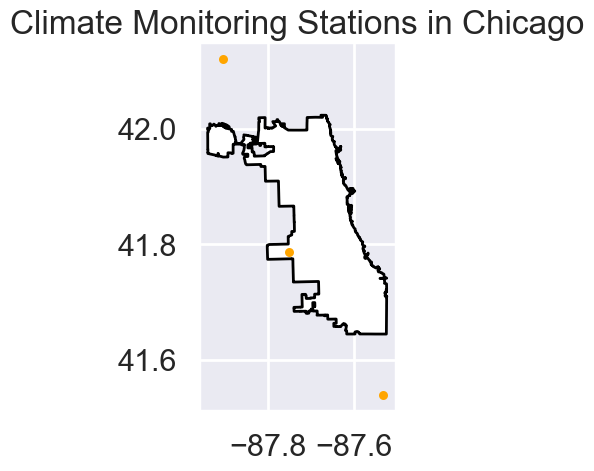

In [280]:
fig, ax = plt.subplots()

chicagoshape2.to_crs("EPSG:4326").plot(ax=ax, color='white', edgecolor='black')
climategdf.plot(ax=ax, color='orange', markersize=20)
plt.title('Climate Monitoring Stations in Chicago')

In [ ]:
lansing = climatedf[climatedf['NAME'] == stationnames[2]]
hourlycols = []
for col in lansing.columns:
    if 'Hourly' in col:
        hourlycols.append(col)
lansingdailycols = []
for i in hourlycols:
    lansing = lansing.dropna(subset=[i])
    lansing[i] = lansing[i].astype(float)
    dailycol = i.replace('Hourly', 'DailyAverage')
    lansing[dailycol] = lansing[i].groupby(lansing['DATE']).mean()

['HourlyAltimeterSetting',
 'HourlyDewPointTemperature',
 'HourlyDryBulbTemperature',
 'HourlyPrecipitation',
 'HourlyPresentWeatherType',
 'HourlyPressureChange',
 'HourlyPressureTendency',
 'HourlyRelativeHumidity',
 'HourlySeaLevelPressure',
 'HourlySkyConditions',
 'HourlyStationPressure',
 'HourlyVisibility',
 'HourlyWetBulbTemperature',
 'HourlyWindDirection',
 'HourlyWindGustSpeed',
 'HourlyWindSpeed']

<Axes: xlabel='YEAR', ylabel='DailyAverageDryBulbTemperature'>

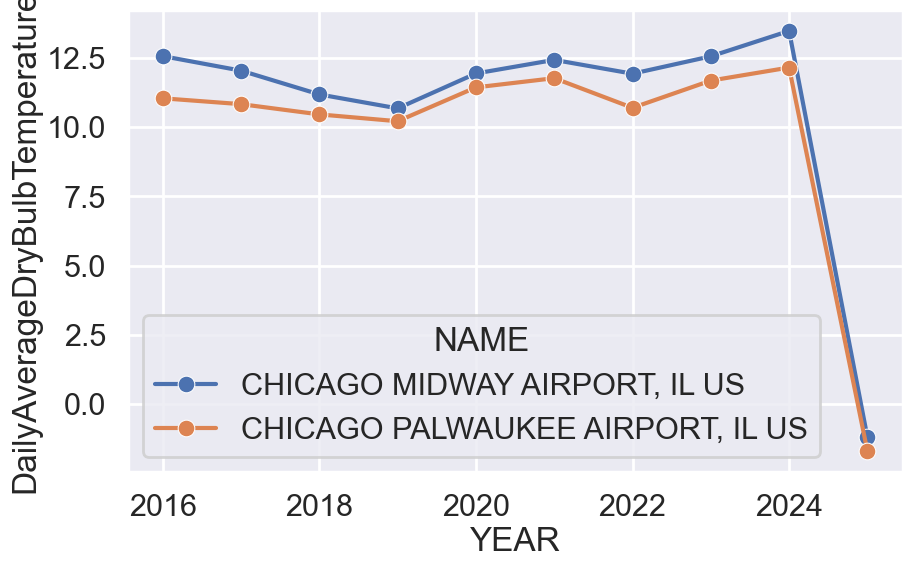

In [ ]:
# Find yearly temperature averages, Max temp averages, plot with a line graph. 
climatedf = climatedf.dropna(subset='DailyAverageDryBulbTemperature')
climatedf = climatedf.query('DailyAverageDryBulbTemperature != "*"')
climatedf['DailyAverageDryBulbTemperature'] = climatedf['DailyAverageDryBulbTemperature'].astype(float)

yearlyavgtemp = climatedf.groupby(['YEAR','NAME'])['DailyAverageDryBulbTemperature'].mean().reset_index()
# yearlyavgtemp
fix, ax = plt.subplots(figsize=(10, 6))
sns.set_theme("poster")
sns.lineplot(x='YEAR', y='DailyAverageDryBulbTemperature', data=yearlyavgtemp, hue='NAME', marker='o')




In [274]:
climatedf['NAME'].unique()

array(['CHICAGO MIDWAY AIRPORT, IL US',
       'CHICAGO PALWAUKEE AIRPORT, IL US'], dtype=object)

In [ ]:
#Do the same for precipitation, look at overall averages, standard deviations and medians 


In [145]:
#Humidity and visitbility may be interesting to plot together on a single graph 

In [ ]:
# Include means, standard deviations, and medians for each of those above variables in a table

# Air Quality Data 

In [140]:
airqualitypath = '/Users/griffinberonio/Documents/AAE 724/Datasets/master_aqs_df_17_031.csv'
airqualitydf = pd.read_csv(airqualitypath)
airqualitydf['date_local'] = pd.to_datetime(airqualitydf['date_local'])
airqualitydf['date_local'].max()
# airqualitydf.head()
colstodrop = ['state_code','county_code','site_number','parameter_code','method_code','cbsa_code','cbsa','date_of_last_change','aqi','poc','method_code']

/var/folders/d1/xmw0d36x7fn39t0jfvtsbzk80000gn/T/ipykernel_33395/3044557522.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  airqualitydf = pd.read_csv(airqualitypath)


In [142]:
# for col in airqualitydf.columns:
#     print(col)

In [ ]:
siteaddresses = airqualitydf[['site_address', 'city', 'state', 'local_site_name']].drop_duplicates()
siteaddresses['full_address'] = siteaddresses['site_address'] + ', ' + siteaddresses['city'] + ', ' + siteaddresses['state']
fulladdresses = siteaddresses[['local_site_name', 'full_address']]
fulladdresses

addressgdf = gpd.tools.geocode(fulladdresses['full_address'])


geopandas.geodataframe.GeoDataFrame

In [ ]:
#Look at overall trend in PM2.5 concentrations, check differences in methods over time, Segment by site. 

In [ ]:
# provide summary statistics for PM2.5 concentrations, including means, standard deviations, and medians, and compare these statistics across different monitoring sites and time periods.

Text(0.5, 1.0, 'Monitoring Sites in Chicago')

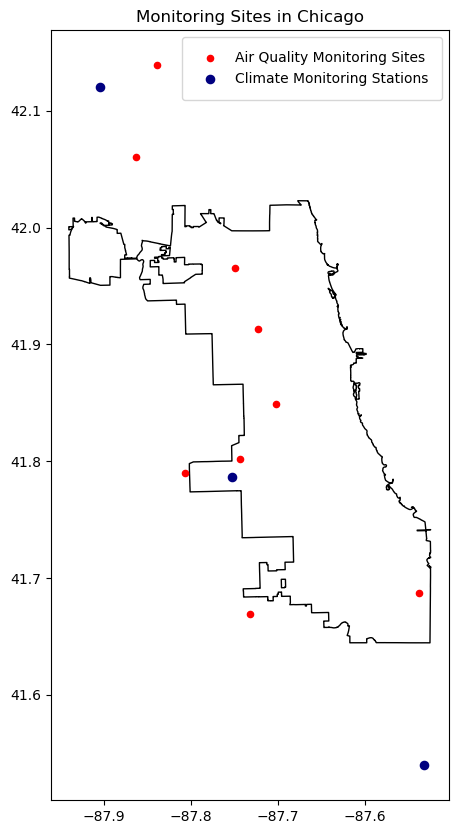

In [138]:

fig, ax = plt.subplots(figsize=(12,10))

chicagoshape2.to_crs("EPSG:4326").plot(ax=ax, color='white', edgecolor='black')
addys = gpd.GeoDataFrame(addressgdf, geometry='geometry', crs="EPSG:4326")
addys.plot(ax=ax, color='red', markersize=20)
climategdf.plot(ax=ax, color='navy', markersize=35)
# plt.legend(['Air Quality Monitoring Sites', 'Climate Monitoring Stations'])
ax.legend(['Air Quality Monitoring Sites', 'Climate Monitoring Stations'], loc='upper right', borderpad=1)
# ax.legend(loc='upper right', borderpad=1)
plt.title('Monitoring Sites in Chicago')



# Merging Datasets

In [146]:
# renewablesdf.head()
climateandrenewables = pd.merge(cookrenewables, climatedf, left_on='Date Online', right_on='DATE', how = 'inner') 

In [147]:
# Individual data so far: cookrenewables, climatedf, airqualitydf
#Years:
rmin = cookrenewables['Date Online'].min()
rmax = cookrenewables['Date Online'].max()
cmin = climatedf['DATE'].min()
cmax = climatedf['DATE'].max()
amin = airqualitydf['date_local'].min()
amax = airqualitydf['date_local'].max()

print(f"Renewables data range: {rmin} to {rmax}, Climate data range: {cmin} to {cmax}, Air Quality data range: {amin} to {amax}")

# Overlapping year range: 2016-2025 


Renewables data range: 1989-03-01 00:00:00 to 2026-01-01 00:00:00, Climate data range: 2016-01-02 00:00:00 to 2025-01-02 23:55:00, Air Quality data range: 2015-01-03 00:00:00 to 2025-11-30 00:00:00
